# Wedding Cost Advance Analysis
Brief walkthrough of the notebook steps to explore the data, build baseline regressors, and evaluate the best-performing model.

## Imports and Setup
Load core libraries for data handling, visualization, preprocessing, and regression modeling.

In [7]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Settings
plt.style.use("default")
sns.set_theme()


## Load and Inspect Data
Read the Excel dataset, take a quick peek at the first rows, and start understanding its structure.

In [8]:
file_path = "Wedding_Dataset_file_final.xlsx"
df = pd.read_excel(file_path)

df.head()


,Wedding_ID,Wedding_Year,District,Location_Type,Ceremony_Type,Wedding_Season,Guest_Count,Venue_Type,Catering_Type,Decoration_Level,Photography_Package,Entertainment_Type,Venue_Cost_LKR,Catering_Cost_LKR,Decoration_Cost_LKR,Photography_Cost_LKR,Entertainment_Cost_LKR,Total_Wedding_Cost_LKR
0,1,2022,Kurunegala,Rural,Muslim,Peak,303,Outdoor,Buffet,Basic,Premium,Live Band,875269,557986,338181,146118,211846,2129400
1,2,2022,Negombo,Urban,Hindu,Peak,258,Hotel,Traditional,Luxury,Premium,Live Band,664117,791870,196161,261086,151966,2065200
2,3,2024,Kurunegala,Semi-Urban,Hindu,Peak,323,Outdoor,Traditional,Basic,Standard,Live Band,1102222,209072,510528,324880,158023,2304725
3,4,2024,Negombo,Rural,Buddhist,Off-Peak,92,Banquet Hall,Plated,Basic,Premium,Traditional,515341,776241,521042,291824,273878,2378326
4,5,2024,Colombo,Urban,Hindu,Peak,273,Hotel,Traditional,Luxury,Basic,DJ,399346,285355,211023,231757,273794,1401275


### Dataset Schema Overview
Display column types, non-null counts, and memory usage to spot missing values or type issues early.

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Wedding_ID              75 non-null     int64 
 1   Wedding_Year            75 non-null     int64 
 2   District                75 non-null     object
 3   Location_Type           75 non-null     object
 4   Ceremony_Type           75 non-null     object
 5   Wedding_Season          75 non-null     object
 6   Guest_Count             75 non-null     int64 
 7   Venue_Type              75 non-null     object
 8   Catering_Type           75 non-null     object
 9   Decoration_Level        75 non-null     object
 10  Photography_Package     75 non-null     object
 11  Entertainment_Type      75 non-null     object
 12  Venue_Cost_LKR          75 non-null     int64 
 13  Catering_Cost_LKR       75 non-null     int64 
 14  Decoration_Cost_LKR     75 non-null     int64 
 15  Photogra

### Summary Statistics
Review central tendency and spread for numeric fields to catch skewness or outliers.

In [ ]:
df.describe()


,Wedding_ID,Wedding_Year,Guest_Count,Venue_Cost_LKR,Catering_Cost_LKR,Decoration_Cost_LKR,Photography_Cost_LKR,Entertainment_Cost_LKR,Total_Wedding_Cost_LKR
count,75.000000,75.000000,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,7.500000e+01
mean,38.000000,2022.773333,272.466667,7.587785e+05,585857.320000,377240.013333,263777.346667,199663.426667,2.185317e+06
std,21.794495,1.133916,107.160190,2.447896e+05,212802.287169,126728.754646,84517.232584,63696.512789,3.609407e+05
min,1.000000,2021.000000,81.000000,3.059060e+05,205628.000000,157564.000000,104138.000000,91413.000000,1.401275e+06
25%,19.500000,2022.000000,189.500000,5.608075e+05,431475.500000,285138.000000,196846.500000,151641.500000,1.964982e+06
50%,38.000000,2023.000000,273.000000,7.600260e+05,613904.000000,377652.000000,261086.000000,194481.000000,2.232813e+06
75%,56.500000,2024.000000,373.000000,9.300865e+05,777515.000000,466174.000000,336076.500000,251914.000000,2.428339e+06
max,75.000000,2024.000000,432.000000,1.192692e+06,898774.000000,596293.000000,399095.000000,299545.000000,2.895380e+06


### Handle Missing Values
Impute numeric columns with medians and categorical columns with their mode to keep rows usable.

In [11]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


### Target Distribution
Plot the distribution of `Total_Wedding_Cost_LKR` to understand scale and skew.

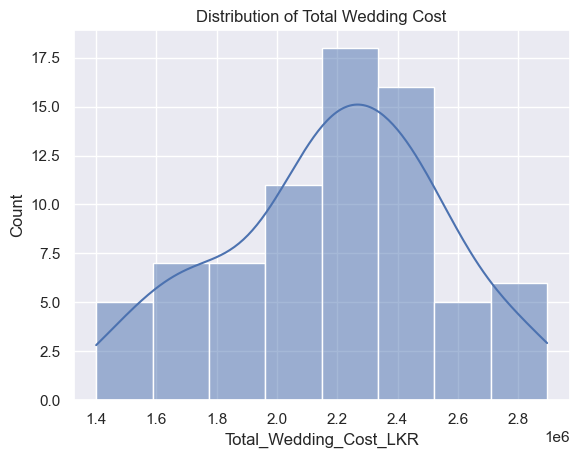

In [13]:
plt.figure()
sns.histplot(df['Total_Wedding_Cost_LKR'], kde=True)
plt.title("Distribution of Total Wedding Cost")
plt.show()



### Guests vs Cost
Check the relationship between guest count and total wedding cost.

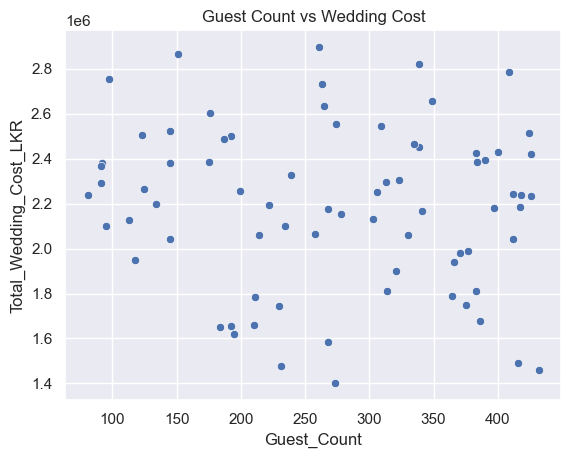

In [15]:
plt.figure()
sns.scatterplot(x='Guest_Count', y='Total_Wedding_Cost_LKR', data=df)
plt.title("Guest Count vs Wedding Cost")
plt.show()


### Seasonal Effects
Explore how wedding season influences total cost.

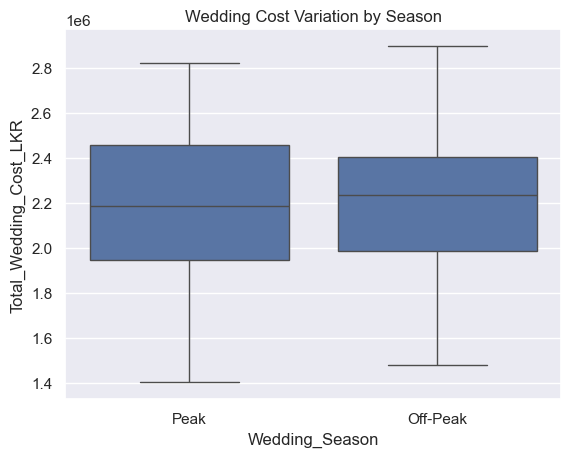

In [17]:
plt.figure()
sns.boxplot(x='Wedding_Season', y='Total_Wedding_Cost_LKR', data=df)
plt.title("Wedding Cost Variation by Season")
plt.show()


### Encode Categorical Features
Convert string-based columns to numeric labels for model compatibility.

In [19]:
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### Scale Numerical Features
Apply Min-Max scaling so all numeric predictors share a common range.

In [20]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


### Train/Test Split
Separate features and target, then create train and test sets for evaluation.

In [21]:
X = df.drop('Total_Wedding_Cost_LKR', axis=1)
y = df['Total_Wedding_Cost_LKR']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Candidate Models
Define a mix of linear and tree-based regressors to benchmark.

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []


### Train and Evaluate
Fit each model, predict on the test set, and record MAE, RMSE, and R².

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    })


### Collect Results
Assemble metrics into a DataFrame and view model performance.

<Axes: xlabel='Model', ylabel='R2'>

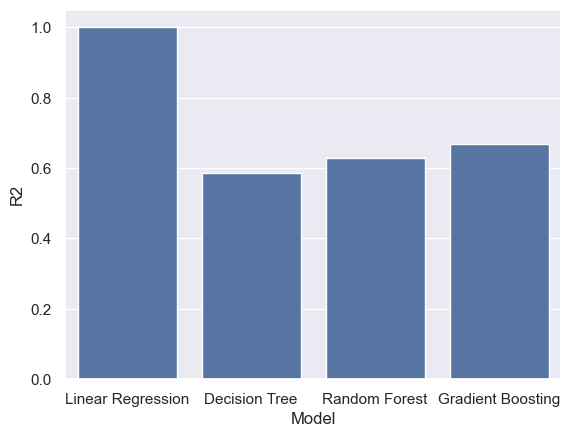

In [25]:
results_df = pd.DataFrame(results)
results_df
plt.figure()
sns.barplot(x='Model', y='R2', data=results_df)

### Visualize R² Scores
Bar plot of coefficient of determination for quick comparison.

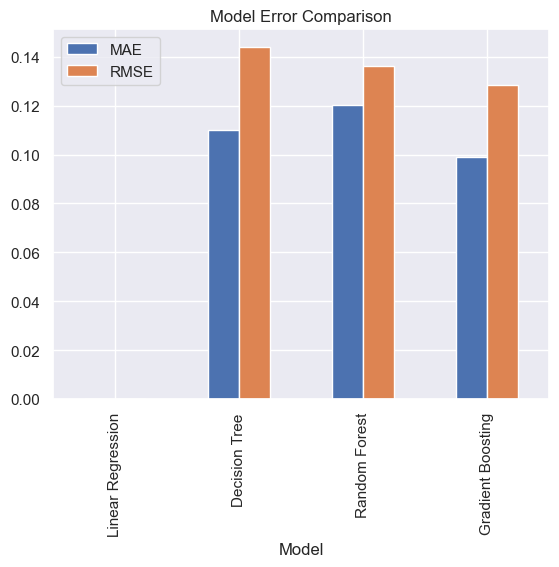

In [26]:
results_df.set_index("Model")[["MAE", "RMSE"]].plot(kind="bar")
plt.title("Model Error Comparison")
plt.show()


### Compare Error Metrics
Plot MAE and RMSE to understand absolute and squared errors across models.

### Fit Best Model
Train the chosen Random Forest regressor on the training data and view its MAE.

In [27]:
best_model = RandomForestRegressor(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Best Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

Best Model Evaluation:
MAE: 0.12021627150256076


### Actual vs Predicted
Scatter plot to see how closely predictions align with true costs.

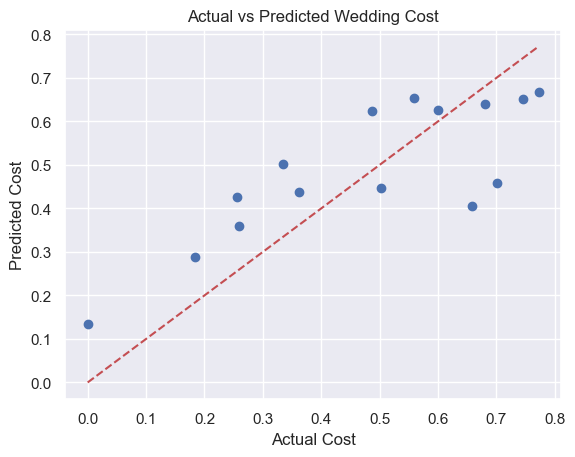

In [28]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Predicted Wedding Cost")
plt.show()


### Residual Analysis
Plot the distribution of errors to spot bias or heavy tails.

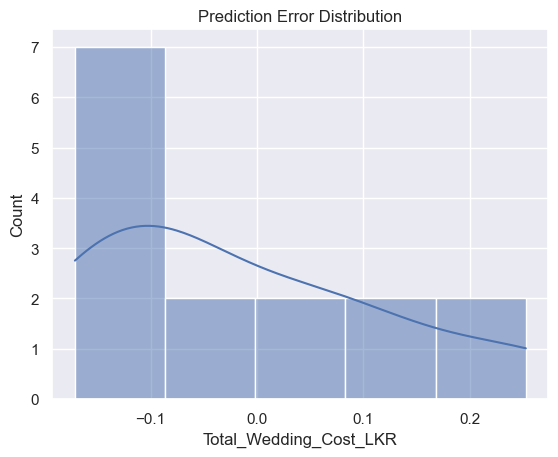

In [29]:
residuals = y_test - y_pred

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Prediction Error Distribution")
plt.show()


### Residual Analysis
Inspect error distribution to check for bias or heteroscedasticity.

<Axes: xlabel='Importance', ylabel='Feature'>

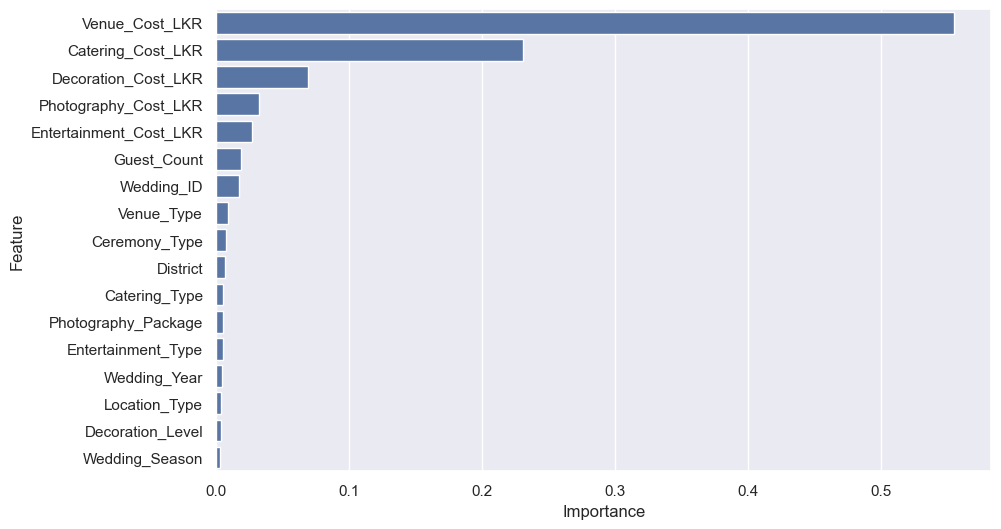

In [30]:
importances = best_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)

### Feature Importance Data
Extract and sort feature importances from the trained Random Forest.

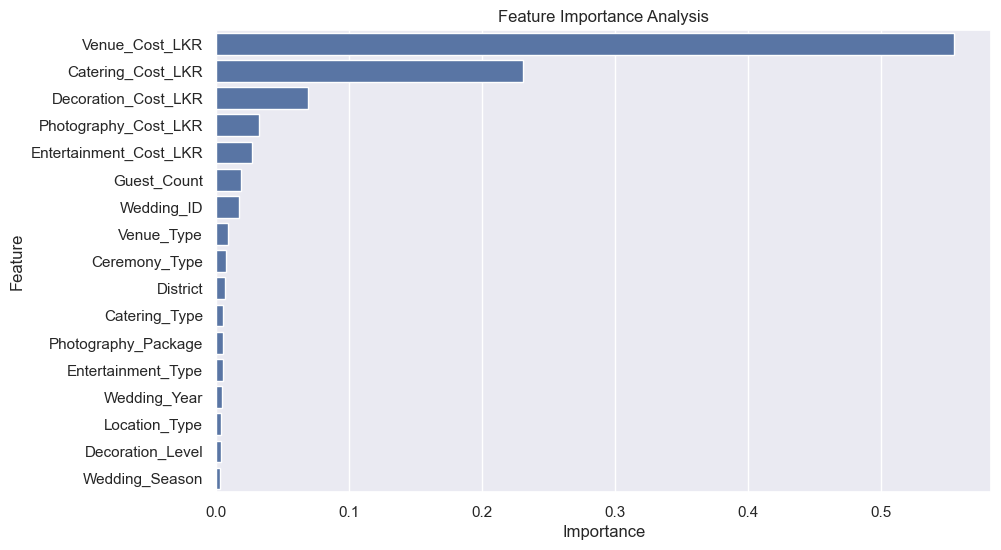

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance Analysis")
plt.show()


### Feature Importance Plot
Visualize which predictors drive the model most strongly.

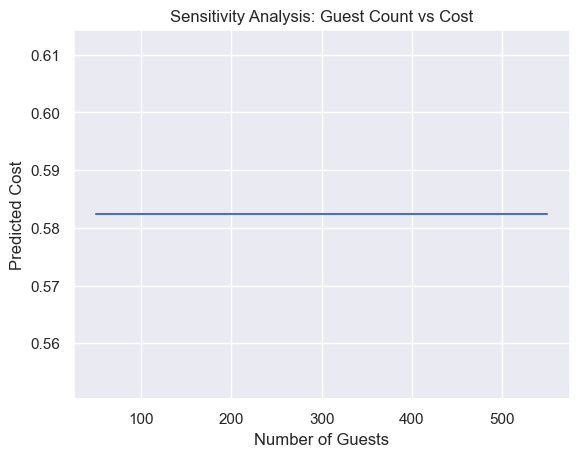

In [33]:
guest_range = np.arange(50, 600, 50)

scenario = X_train.mean().to_frame().T
costs = []

for g in guest_range:
    scenario['Guest_Count'] = g
    costs.append(best_model.predict(scenario)[0])

plt.figure()
plt.plot(guest_range, costs)
plt.xlabel("Number of Guests")
plt.ylabel("Predicted Cost")
plt.title("Sensitivity Analysis: Guest Count vs Cost")
plt.show()
